In [1]:
from itertools import chain, combinations
import networkx as nx

In [2]:
def powerset(iterable):
    """Return the powerset of an iterable as a list of lists.
    
    Args:
        iterable (list): list of elements to take the powerset of
        
    Example:
        >>> for x in powerset([1, 2, 3]):
        >>>    print(x)
        ()
        (1,)
        (2,)
        (3,)
        (1, 2)
        (1, 3)
        (2, 3)
        (1, 2, 3)

    Returns:
        iterator: iterator over the powerset of the input list
    """
    s = list(iterable)
    return chain.from_iterable(combinations(s, r) for r in range(len(s)+1))


def subsets(iterable, lenght=None):
    K = lenght or len(iterable)
    for x in powerset(iterable):
        if len(x) > K:
            break
        yield x

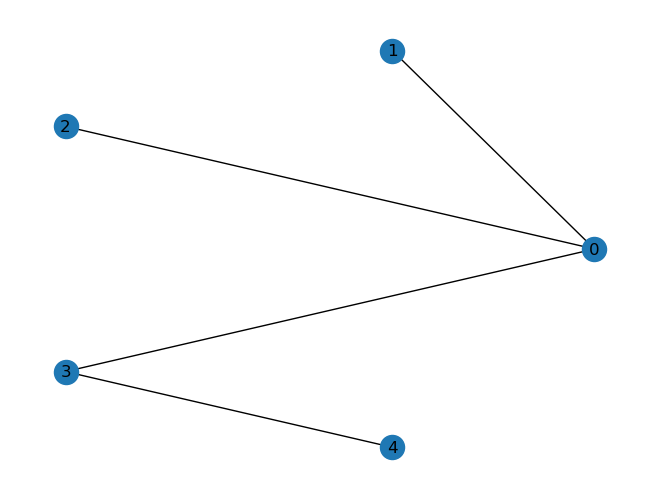

In [3]:
n = 5  # number of vertices
m = 1  # number of edges for each new vertex in barabasi_albert_graph

graph = nx.barabasi_albert_graph(n, m, seed=42)
nx.draw_circular(graph, with_labels=True)

In [4]:
nodes = list(graph.nodes)
edges = list(graph.edges)
print(f'nodes: {nodes}\nedges: {edges}')

nodes: [0, 1, 2, 3, 4]
edges: [(0, 1), (0, 2), (0, 3), (3, 4)]


In [5]:
for subset in subsets(nodes):
    print(subset)

()
(0,)
(1,)
(2,)
(3,)
(4,)
(0, 1)
(0, 2)
(0, 3)
(0, 4)
(1, 2)
(1, 3)
(1, 4)
(2, 3)
(2, 4)
(3, 4)
(0, 1, 2)
(0, 1, 3)
(0, 1, 4)
(0, 2, 3)
(0, 2, 4)
(0, 3, 4)
(1, 2, 3)
(1, 2, 4)
(1, 3, 4)
(2, 3, 4)
(0, 1, 2, 3)
(0, 1, 2, 4)
(0, 1, 3, 4)
(0, 2, 3, 4)
(1, 2, 3, 4)
(0, 1, 2, 3, 4)


In [6]:
K = 2
for subset in subsets(nodes, K):
    print(subset)

()
(0,)
(1,)
(2,)
(3,)
(4,)
(0, 1)
(0, 2)
(0, 3)
(0, 4)
(1, 2)
(1, 3)
(1, 4)
(2, 3)
(2, 4)
(3, 4)


In [7]:
def is_vertex_cover(edges, subset_nodes):
    for u, v in edges:
        if u not in subset_nodes and v not in subset_nodes:
            return False
    return True

In [8]:
K = 3
for subset in subsets(nodes, K):
    print(f'subset tested: {subset}')
    if is_vertex_cover(edges, subset):
        print(f'Subset {subset} is a vertex cover')
        break

subset tested: ()
subset tested: (0,)
subset tested: (1,)
subset tested: (2,)
subset tested: (3,)
subset tested: (4,)
subset tested: (0, 1)
subset tested: (0, 2)
subset tested: (0, 3)
Subset (0, 3) is a vertex cover
